In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
data = pd.read_csv('DataSet/salary.csv')

In [3]:
data.head(2)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000


In [4]:
data_n = data[['Age','Income($)']]

In [5]:
data_n.head(2)

,Age,Income($)
0,27,70000
1,29,90000


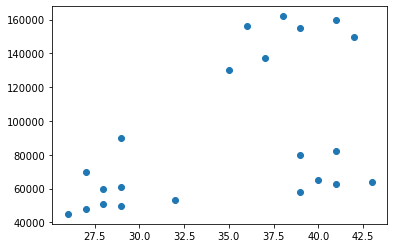

In [6]:
plt.scatter(data['Age'],data['Income($)'])


In [7]:
from sklearn.cluster import KMeans

In [8]:
km = KMeans(n_clusters=3)

In [9]:
# data.iloc[:,1:]

In [10]:
prediction = km.fit_predict(data.iloc[:,1:])

In [11]:
prediction

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [12]:
data['cluster'] = prediction

In [13]:
data.head(2)

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2


In [14]:
df0 = data[data.cluster==0]
df1 = data[data.cluster==1]
df2 = data[data.cluster==2]

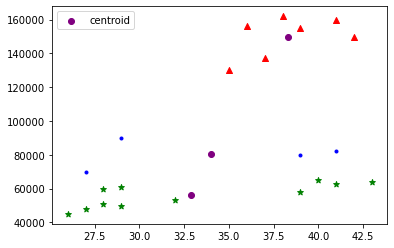

In [15]:
plt.scatter(df0.Age,df0['Income($)'],c='g',marker='*')
plt.scatter(df1.Age,df1['Income($)'],color='r',marker='^')
plt.scatter(df2.Age,df2['Income($)'],c='b',marker='.')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='o',label='centroid')
plt.legend()

In [16]:
scaler = MinMaxScaler()
scaler.fit(data[['Income($)']])

MinMaxScaler()

In [17]:
data['Income($)'] = scaler.transform(data[['Income($)']])

In [18]:
scaler.fit(data[['Age']])
data.Age = scaler.transform(data[['Age']])

In [19]:
data.head(2)

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2


In [20]:
df0 = data[data.cluster==0]
df1 = data[data.cluster==1]
df2 = data[data.cluster==2]

In [21]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

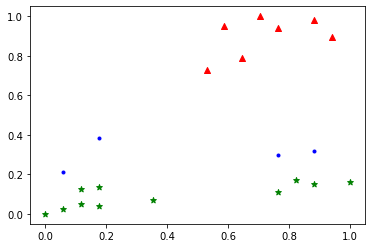

In [22]:
plt.scatter(df0.Age,df0['Income($)'],c='g',marker='*')
plt.scatter(df1.Age,df1['Income($)'],color='r',marker='^')
plt.scatter(df2.Age,df2['Income($)'],c='b',marker='.')


In [23]:
kmn = KMeans(n_clusters=3)

In [24]:
kmss = kmn.fit_predict(data[['Age','Income($)']])

In [25]:
data.cluster = kmss
data.head(2)

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1


In [26]:
kmn.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [27]:
df0 = data[data.cluster==0]
df1 = data[data.cluster==1]
df2 = data[data.cluster==2]

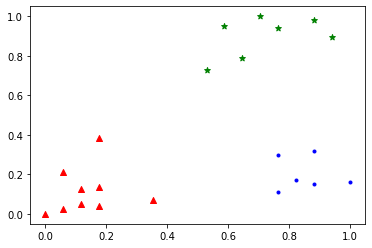

In [28]:
plt.scatter(df0.Age,df0['Income($)'],c='g',marker='*')
plt.scatter(df1.Age,df1['Income($)'],color='r',marker='^')
plt.scatter(df2.Age,df2['Income($)'],c='b',marker='.')
# plt.legend()

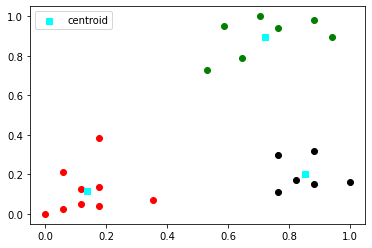

In [29]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(kmn.cluster_centers_[:,0],kmn.cluster_centers_[:,1],color='cyan',marker='s',label='centroid')
plt.legend()


# Elbow Plot
## Used to select n-value

In [39]:
sse = []
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit_predict(data[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\kaushal prajapat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [40]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2664030124668416,
 0.21055478995472496,
 0.17681044133887716,
 0.13265419827245162,
 0.10383752586603562]

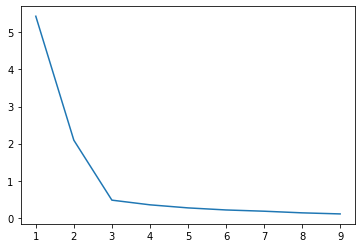

In [41]:
plt.plot(range(1,10),sse)